**Задание 1**

Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. 
Создайте датафреймы X и y из этих данных.

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

Масштабируйте данные с помощью StandardScaler.

Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.

Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

In [4]:
data = boston.data
feature_names = boston.feature_names
target = boston.target

In [10]:
X = pd.DataFrame(data, columns = feature_names)
price = boston.target

In [6]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size = 0.2, random_state = 42)

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [20]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [21]:
X_train_tsne

array([[ 17.645624  ,  28.406218  ],
       [  1.6133794 , -11.563689  ],
       [-14.5985    , -16.157717  ],
       [ 27.65398   ,  24.220755  ],
       [  3.8739002 ,  -9.40449   ],
       [ -2.0326433 , -15.587415  ],
       [ -0.48839292, -14.178003  ],
       [-23.318121  , -13.778156  ],
       [ 27.593517  ,  25.564125  ],
       [ 24.52684   ,  24.971394  ],
       [ -0.4837361 , -14.802191  ],
       [ -4.706522  ,  -6.1135483 ],
       [ -7.6053567 ,  -2.4791708 ],
       [ 25.225407  ,  24.14793   ],
       [ -9.633202  ,  -3.0656078 ],
       [  9.137457  ,  -6.7359676 ],
       [  2.062477  ,  -6.3994236 ],
       [-15.625919  , -16.7226    ],
       [-10.261498  , -14.384683  ],
       [-10.831577  , -18.551825  ],
       [ 23.060835  ,  28.409035  ],
       [  0.7136497 ,  -3.6644816 ],
       [ -3.6749017 , -16.457159  ],
       [ -0.679544  , -11.812288  ],
       [-23.207016  , -14.088349  ],
       [ -6.919917  ,  -2.852082  ],
       [  0.6825832 ,  11.351543  ],
 

In [22]:
X_train_tsne.shape

(404, 2)

In [28]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%config InluneBackend.figure_format = 'svg'
%matplotlib inline

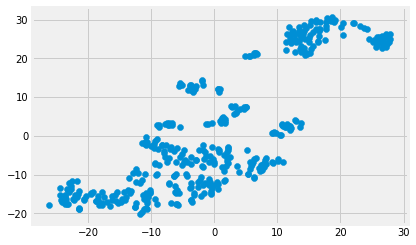

In [29]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

**Задание 2**

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, 
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.

Вычислите средние значения price и CRIM в разных кластерах.

In [30]:
from sklearn.cluster import KMeans

In [41]:
kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

In [42]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [43]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

In [44]:
labels_test = kmeans.predict(X_test_scaled)

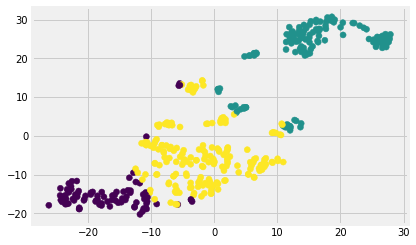

In [47]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

(0, 1)

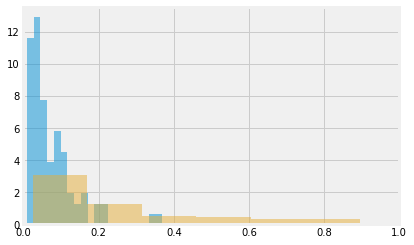

In [65]:
plt.hist(X_train.loc[labels_train == 0, "CRIM"], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 1, "CRIM"], bins = 20, density = True, alpha=0.5)
plt.hist(X_train.loc[labels_train == 2, "CRIM"], bins = 20, density = True, alpha=0.5)
plt.xlim(0,1)

In [73]:
X_train.loc[labels_train == 0, "CRIM"].mean()

0.07356558139534886

In [74]:
X_train.loc[labels_train == 1, "CRIM"].mean()

10.797028425196853

In [76]:
X_train.loc[labels_train == 2, "CRIM"].mean()

0.42166020942408367

In [80]:
y_train[labels_train == 0].mean()

27.78837209302326

In [81]:
y_train[labels_train == 1].mean()

16.165354330708663

In [82]:
y_train[labels_train == 2].mean()

24.958115183246072

**Задание 3**


Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [84]:
labels_train1 = kmeans.fit_predict(X_test_scaled)

In [85]:
pd.value_counts(labels_train1)

1    53
2    35
0    14
dtype: int64

In [88]:
X_test.loc[labels_train1 == 0, "CRIM"].mean()

0.08618571428571427

In [89]:
X_test.loc[labels_train1 == 1, "CRIM"].mean()

0.25200716981132076

In [91]:
X_test.loc[labels_train1 == 2, "CRIM"].mean()

10.165531142857143

In [93]:
y_test[labels_train1 == 0].mean()

33.871428571428574

In [94]:
y_test[labels_train1 == 1].mean()

21.552830188679245

In [95]:
y_test[labels_train1 == 2].mean()

16.43714285714286